<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/docs/introModeling/IntroModeling1_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/new-home-sales-2.jpg" width="500" alt="colab">
</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

## <font color='darkorange'>Linear regression</font>

In previous classes we have used exploratory approaches to visualize and quantify relationships between variables. Now we will use linear regression to start to build models that can make predictions based on these relationships.

Import the needed libraries

In [3]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf


### <font color='darkorange'>Load the data</font>

Download the 'bostonHouses.csv' from the class's [shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing) and load it into a dataframe.
> Note: one way to get the data in, is just to drag and drop the csv file into the files tab on the left. However, using this method means that when we leave our session the data will be removed (i.e., it isn't on your gdrive).

In [5]:
df_boston = pd.read_csv('/content/drive/MyDrive/dataDSI/bostonHouses.csv')

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Q: What kinds of data do you have?


In [6]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Q: Are there missing values anywhere?

In [7]:
df_boston.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### <font color='darkorange'>Visualize and Explore</font>

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Plot the house prices on the y-axis, with some other variables on the x-axis.
> Generally the value we are trying to predict is called the response variable, while the values we are using to make those predictions are the predictor variables.

<Axes: xlabel='PTRATIO', ylabel='price'>

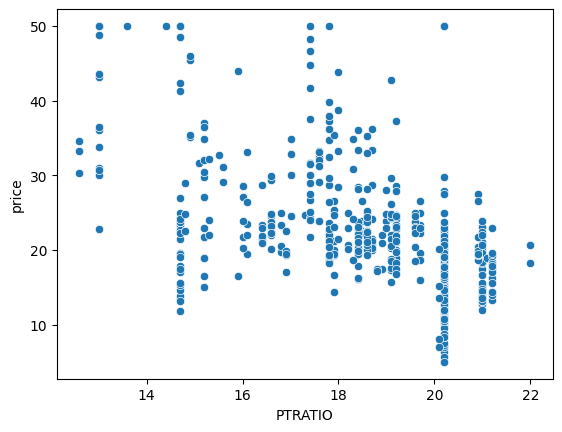

In [14]:
sns.scatterplot(data=df_boston, x="PTRATIO",y="price")

Create a heat map to help you identify potentially interesting relationships.

<Axes: >

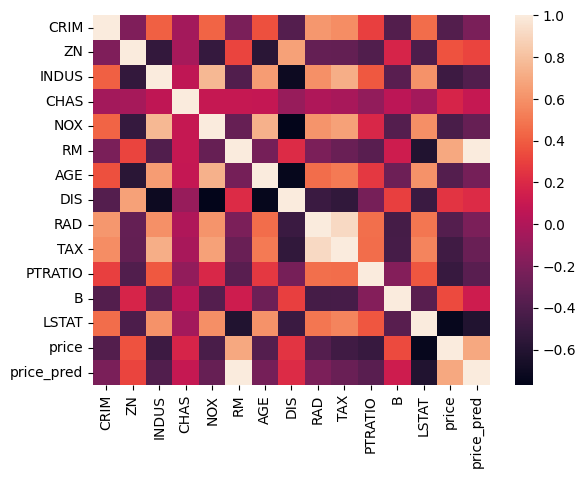

In [19]:
#heatmap
df_boston_corr = df_boston.corr()
sns.heatmap(data=df_boston_corr)

### <font color='darkorange'>Build and train a model </font>

Let's look at building our first model -- linear regression!
> How well can we predict the price of a house based on the proportion of large lots in the area (i.e., the ZN value)?

In [20]:
#Build the model
linear_reg_model = smf.ols(formula='price ~ RM', data=df_boston)

#Use the data to fit the model (i.e., find the best intercept and slope parameters)
linear_reg_results = linear_reg_model.fit()

#make predictions using the model
df_boston['price_pred'] = linear_reg_results.predict(df_boston)

Let's take a look at the predictions!

In [21]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,25.339584
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,21.034286
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,28.825691
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,27.169108


Let's plot the predictions

<Axes: xlabel='RM', ylabel='price'>

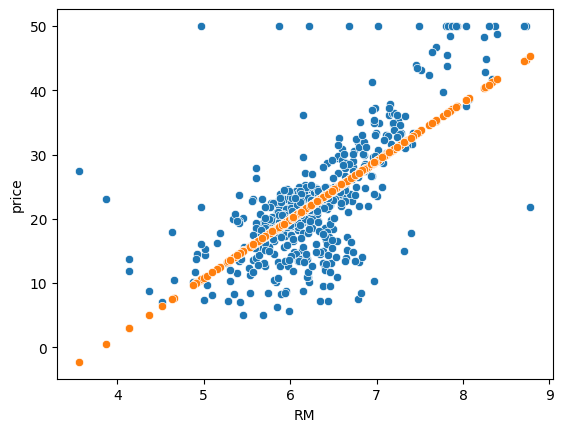

In [22]:
sns.scatterplot(data=df_boston,x='RM', y='price')
sns.scatterplot(data=df_boston,x='RM', y='price_pred')


We can see that all the predicted points fall along a line. This is y = a + b*rooms.

Let's take a look at what values for a (intercept) and b (slope RM) the model estimated.

In [23]:
print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.49e-74
Time:                        20:05:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Before moving on let's drop the predictions we have made so far.

In [24]:
df_boston = df_boston.drop('price_pred',axis=1)

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Training / Testing Split </font>


</br>
</br>
We will follow a general approach when building models. We will divide the dataset into *training* and *testing* datasets.
</br>
This lets us fit the model to one part of the data and then use the withheld data to test the predictions of the model. This helps us avoid *overfitting* our model!

In [25]:
#load libraries to do the training and testing split
from sklearn.model_selection import train_test_split

#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df_boston, test_size=0.20)

In [26]:
#take a look at the shape of the training dataset
df_train.shape

(404, 14)

In [27]:
#take a look at the shape of the testing dataset
df_test.shape


(102, 14)

### <font color='darkorange'>Fit a model </font>

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

In general when using sklearn to fit a model we will follow these steps:

In [29]:
#define model parameters
linear_reg_split_model = smf.ols(formula='price ~ RM', data=df_train) #note: using training data

#fit the model to the training data
linear_reg_split_results = linear_reg_split_model.fit()

#make predictions using the model
df_train['price_pred'] = linear_reg_split_results.predict(df_train) #note: using train data
df_test['price_pred'] = linear_reg_split_results.predict(df_test) #note: using test data

#Get a summary of the model parameters
print(linear_reg_split_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     372.4
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.37e-59
Time:                        20:09:18   Log-Likelihood:                -1345.9
No. Observations:                 404   AIC:                             2696.
Df Residuals:                     402   BIC:                             2704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.7945      3.055    -11.718      0.0

Visualize predictions on the training dataset

<Axes: xlabel='RM', ylabel='price'>

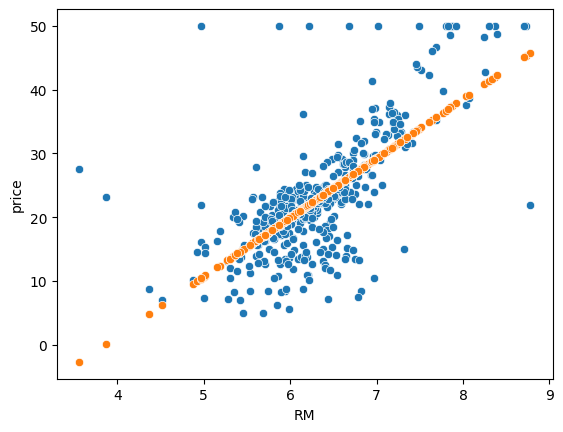

In [30]:
sns.scatterplot(data=df_train,x="RM",y="price") # observed price
sns.scatterplot(data=df_train,x="RM",y="price_pred") #predicted price

Visualize predictions on the testing dataset

<Axes: xlabel='RM', ylabel='price'>

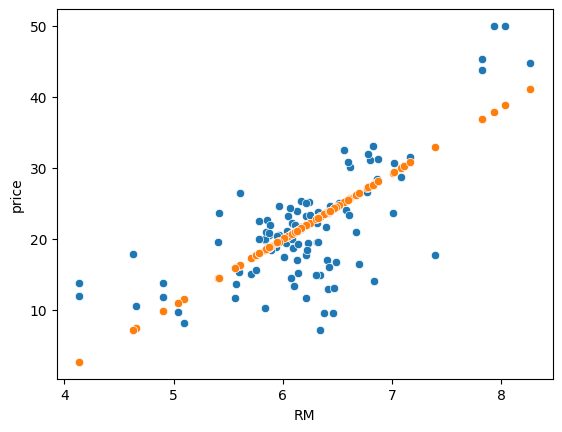

In [31]:
sns.scatterplot(data=df_test,x="RM",y="price") # observed price
sns.scatterplot(data=df_test,x="RM",y="price_pred") # predicted price


How good is the model at predicting?

> Making predictions in the training dataset

In [32]:
#mean squared error
mse_train = sk.metrics.mean_squared_error(df_train['price'], df_train['price_pred'])

print(" Mean squared error = ", mse_train)

 Mean squared error =  45.83921848853556


> Making predictions in the testing dataset (not used to fit the model)

In [33]:
#mean squared error
mse_test = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred'])

print(" Mean squared error = ", mse_test)

 Mean squared error =  34.87227687254803


Q: Which prediction error is higher?

Q: Is all that error just noise? Or could there be other variables that might explain why the predictions are off?

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Fit a more complex model</font>

This time we will try multiple linear regression

In [52]:
#define model parameters, and the training data to be used
multi_linear_reg = smf.ols(formula='price ~ RM + PTRATIO + TAX', data=df_train) #use training data

#fit the model to the training data
results_RN_ZN = multi_linear_reg.fit()

#Predict values in the testing dataset
df_test['price_pred_RM_ZN'] = results_RN_ZN.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(results_RN_ZN.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     244.7
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.52e-70
Time:                        20:34:53   Log-Likelihood:                -1317.2
No. Observations:                 404   AIC:                             2640.
Df Residuals:                     401   BIC:                             2652.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6205      4.899     -0.943      0.3

Visualize and explore these predictions

In [53]:
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_pred,price_pred_RM_ZN
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6,18.784238,17.237270
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2,21.303544,18.407427
271,0.16211,20.0,6.96,0,0.464,6.240,16.3,4.4290,3,223,18.6,396.90,6.59,25.2,22.214585,22.104941
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0,23.860035,21.557313
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,20.940987,19.072893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,18.06,22.5,17.966161,18.489081
227,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307,17.4,372.08,6.36,31.6,30.795099,30.868932
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,26.500194,23.804369
344,0.03049,55.0,3.78,0,0.484,6.874,28.1,6.4654,5,370,17.6,387.97,4.61,31.2,28.108459,28.338806


First let's look at how the model predicts the price of houses in the testing dataset. Now that we have two predictors we'll have to look at one at a time.
</br>
Let's look at the number of rooms (RM) first:

<Axes: xlabel='RM', ylabel='price'>

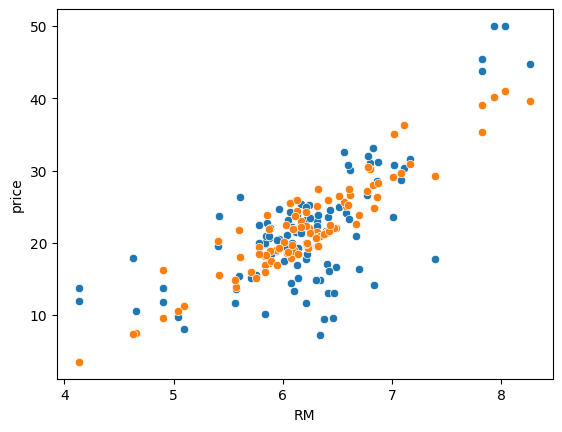

In [54]:
sns.scatterplot(data=df_test,x='RM', y='price')
sns.scatterplot(data=df_test,x='RM', y='price_pred_RM_ZN')


Then at lot size (ZN):

<Axes: xlabel='ZN', ylabel='price'>

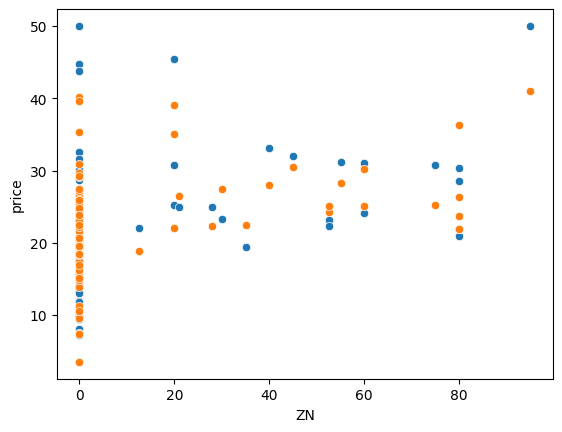

In [55]:
sns.scatterplot(data=df_test,x='ZN', y='price')
sns.scatterplot(data=df_test,x='ZN', y='price_pred_RM_ZN')

How good is the model at predicting?

In [56]:
#mean squared error
mse_multi = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred_RM_ZN'])

print(" Mean squared error = ", mse_multi)



 Mean squared error =  26.369499735584007


Q: how does that compare to our simple model?

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Try adding more variables!</font>

 Run a linear regression model to predict house prices. Try and beat the RMSE of the previous models! Feel free to post to slack your results and RMSE scores! Does RMSE always decrease as you add more variables?

In [ ]:
#define model parameters
large_linear_reg = smf.ols(formula='price ~ RM + PTRATIO + TAX + LSTAT', data=df_train) #use training data

#fit the model to the training data
large_linear_reg_res = large_linear_reg.fit()

#Predict values in the testing dataset
df_test['price_pred_large'] = large_linear_reg_res.predict(df_test) #predict on testing data

#predit with the full model
df_test['price_pred_full'] = ?

#Get a summary of the model parameters
print(?)

How well does it do on the test data?

In [ ]:
#mean squared error
mse_full = ?

print(" Mean squared error = ", ?)


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/stopsign.jpg" width="100" alt="colab">
</p>

### <font color='darkorange'>Explaining how the model is making predictions</font>

With linear regression we can look to see what features are important when making predictions. We can also see the direction and magnitude of the effect of these features.
> E.g., more rooms in a house are positively associated with house price

Let's take a look at how to make it easier to see which features are important when making predictions.
> To do this we'll ensure that all numeric features are on the same scale (e.g., mean of 0, and standard deviation of 1).

Data wrangling: preprocessing the data

In [ ]:
from sklearn.preprocessing import StandardScaler


Data preprocessing should be done after the training testing split

In [ ]:
#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df_boston, test_size=0.20)

As the preprocessing step can be quite time consuming, we will use a function called DataFrameMapper to help make it easier. The steps to use this function are:
1. Build the transformer
2. Fit the transformer and
3. Use the transformer to transform the data


In [ ]:
#create a copy of your dataframe to transform
df_train_scaled = df_train.copy()

#1. build the preprocessing transformer
scal = StandardScaler()

#2. Fit the DataFrameMapper, and transform the data
df_train_scaled[:] = scal.fit_transform(df_train)

#take a look
df_train_scaled

Q: estimate the mean and standard deviation for one of the new transformed features.

Now run your best model again, this time with the scaled training data.

In [ ]:
#define model parameters, and the training data to be used
best_linear_reg_scaled = smf.ols(formula='price ~ RM', data=df_train_scaled)

#fit the model to the training data
?

#Get a summary of the model parameters
?


We can now compare the relative effect of each of the features in predicting the price of a house.
> e.g the magnitude and direction of each parameter estimate.




### <font color='darkorange'>Further reading</font>

Read more about [using statsmodel](https://www.statsmodels.org/stable/gettingstarted.html) to run regression models.


> If you would like the notebook without missing code check out the [full code](https://colab.research.google.com/github/tbonne/peds/blob/main/docs/fullNotebooks/full_IntroModeling1_LinearReg.ipynb) version.